<h1><font color='hotpink' face='Comic Sans MS'> Mathias Godwin </font></h1>
              <hr>
<h3 style="width:35%;
       border:70%;
      border-color:red;
     border-radius:20px 0px 2px">
    <font color="hotpink" face="Comic Sans MS">
    mathiasgodwin @kaggle 
    <br> godwinsaint6@gmail.com
    <br><br>
    Mathias-Godwin @github
    </font></h3>

# A package in progress

In [1]:
import pandas as pd
import numpy as np
import sklearn
class sqimner():
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
    class regressor():
        
        def fit(models, scoring=None, params=None,cross_val=None, cv=5, n_jobs=2):
            mae_regress, mse_regress, sqr_regress, r2= {}, {}, {}, {}

            if type(models) is not list:
                raise ValueError(f'your models must all be in a list, you provided "{type(models).__name__}"')
            
            if cross_val is None:
                
                for model in models:
                    modeller = model.fit(X_train, y_train)
                    prediction = modeller.predict(X_test)
                    metrick1 = sklearn.metrics.mean_absolute_error(y_pred=prediction, y_true=y_test)
                    metrick2 = sklearn.metrics.mean_squared_error(y_pred=prediction, y_true=y_test)
                    metrick3 = (sklearn.metrics.mean_absolute_error(y_pred=prediction, y_true=y_test))**0.5
                    metrick4 = (sklearn.metrics.r2_score(y_pred=prediction, y_true=y_test))
            
                    
                    mae_regress[f'{type(model).__name__}'] = metrick1
                    mse_regress[f'{type(model).__name__}'] = metrick2
                    sqr_regress[f'{type(model).__name__}'] = metrick3
                    r2[f'{type(model).__name__}'] = metrick4
                    grouping =  {'Model':list(mae_regress.keys()), 
                          'MAE':list(mae_regress.values()), 
                           'MSE':list(mse_regress.values()),
                            'MAE_sqr':list(sqr_regress.values()),
                                'r2_score':list(r2.values())}
                return pd.DataFrame(grouping)
            
            def to_dataframe(bound_data):
                global value
                for value in bound_data:
                    pass
                return pd.DataFrame(value)
            
            if cross_val.__name__ == 'cross_validate' and scoring != None:
                enlist = []
                for model in models:
                    
                    from sklearn.model_selection import cross_validate
                    accuracies = lambda model, X_train, y_train: cross_val(
                        estimator=model,
                        X=X_train, y=y_train, scoring=scoring, cv=cv, n_jobs=n_jobs)
                    modeller = model.fit(X_train, y_train)
                    prediction = modeller.predict(X_test)
                    get_all_accu = accuracies(model, X_train, y_train)
                    enlist.append(get_all_accu)
                return to_dataframe(enlist)

            
            if cross_val.__name__ == 'cross_val_predict' and scoring != None:
                to_dict = {}
                for model in models:
                    pred = cross_val_predict(estimator=model, X=X_train, y=y_train,
                                            cv=cv, n_jobs=n_jobs)
                    to_dict.update({f'{type(model).__name__}':pred}) 
                return pd.DataFrame(to_dict)


# Example

In [2]:
train = pd.read_csv(r"D:\Spyder\MY PROJECT\Advertising.csv")
train.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ARDRegression, SGDRegressor, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
X = train.drop(['sales'], axis=1)
y = train.sales

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                   random_state=1)

In [5]:
linear = LinearRegression()
forest = RandomForestRegressor(random_state=1)
gradient = GradientBoostingRegressor(random_state=1)
tree = ExtraTreesRegressor()
ard = ARDRegression()
sgd = SGDRegressor()
th = TheilSenRegressor()

combine = [linear, forest, gradient, tree, ard, sgd, th]
from sklearn.model_selection import *

In [6]:
sqimner(X_train, X_test, y_train, y_test)
import matplotlib.pyplot as plt
import seaborn as sns
# from analysis import eda

In [7]:
sq = sqimner(X_train, X_test, y_train, y_test)
ss =  sq.regressor.fit(combine, scoring='r2',cross_val=cross_val_predict)

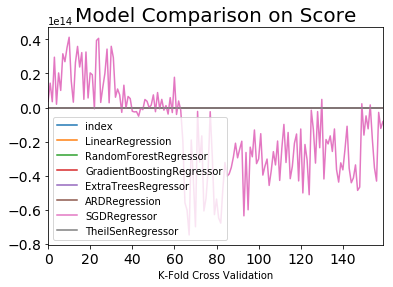

In [9]:
a = ss.reset_index()
# Horizontal bar chart of test mae
a.sort_values('index', ascending = True).plot()

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);


In [10]:
ss

,LinearRegression,RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,ARDRegression,SGDRegressor,TheilSenRegressor
0,3.730840,6.06,5.261951,5.07,3.712219,3.601404e+12,5.241913
1,7.260346,9.98,9.549959,9.56,7.251113,1.427811e+13,8.424295
2,6.082100,6.62,7.093322,6.72,6.093165,3.385111e+12,7.403102
3,18.449597,18.58,18.379123,18.72,18.399220,2.947883e+13,18.751509
4,8.509711,5.89,5.907915,6.18,8.472181,1.904011e+12,9.726802
5,14.103403,14.89,14.105589,14.84,14.152234,2.026057e+13,14.684397
6,15.104507,13.89,14.645025,13.97,15.128299,1.000565e+13,15.733525
7,20.352757,21.11,21.681758,21.63,20.370083,3.149219e+13,20.436640
8,20.571483,21.31,22.644249,22.25,20.654628,2.685432e+13,20.614178
9,19.630715,19.86,19.984562,20.33,19.459143,3.508006e+13,19.925747
